# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [2]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [117]:
# Write your answer here
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.apionly as sns
import matplotlib.pyplot as plt

sns.set_style("dark")

def files_for_country(c):
    pattern = '{}/ebola/{}_data/*.csv'.format(DATA_FOLDER, c)
    return glob.glob(pattern)

def row_description_file_analysis(df, data_field='Description', file_field='File'):
    df = df.copy()
    df = df[[data_field, file_field]]
    df['Count'] = 1
    pivot = df.pivot(index='Description', columns='File', values='Count')
    pivot.fillna(value=0.0, inplace=True)
    pivot.sort_index()
    return pivot, len(pivot.columns), len(pivot.index)
    

In [118]:
# np.repeat(np.arange(0,1,0.1), 3)
print(np.arange(0,10))
x = [1,2,3]
y = [-1,-2,-3]
xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')
print(xv.ravel())
print(yv.ravel())

[0 1 2 3 4 5 6 7 8 9]
[1 1 1 2 2 2 3 3 3]
[-1 -2 -3 -1 -2 -3 -1 -2 -3]


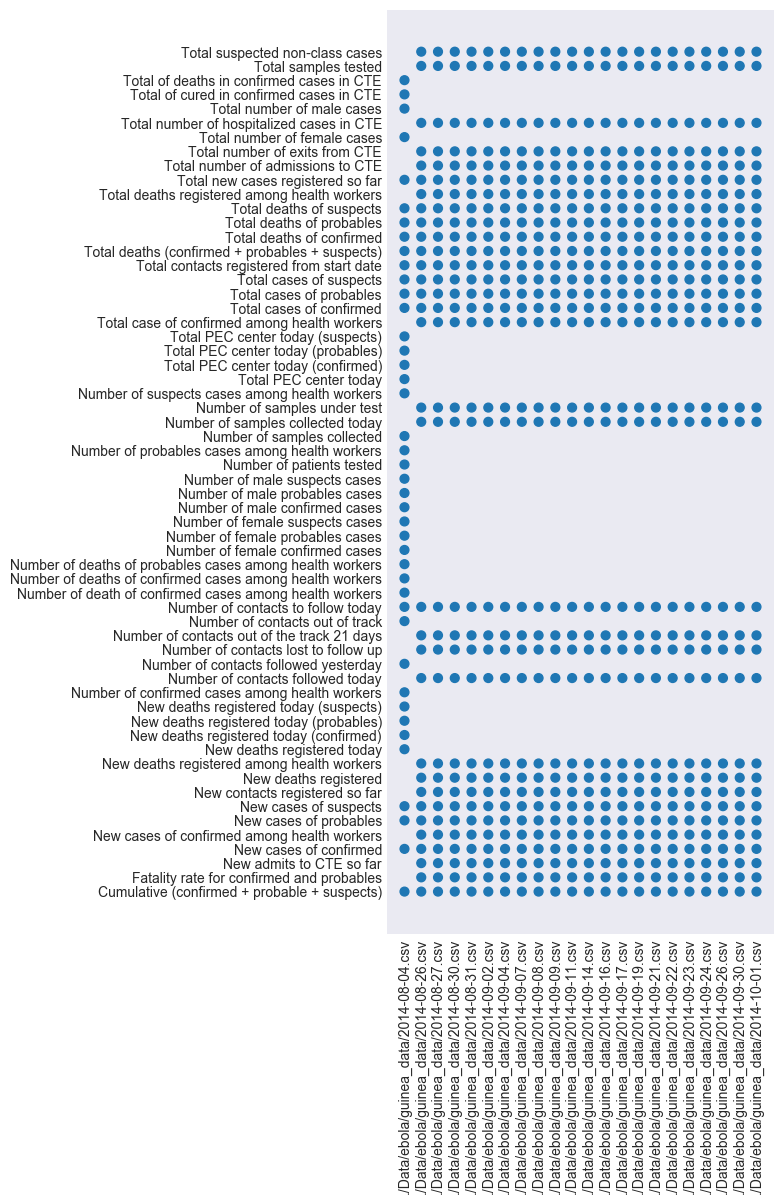

In [119]:
files = files_for_country('guinea')
dfs = []
for f in files:
    df = pd.read_csv(f, parse_dates=['Date'])
    df['File'] = f
    dfs.append(df)
    
guinea = pd.concat(dfs)
guinea = guinea[['Date', 'Description', 'Totals', 'File']]
guinea = guinea.fillna(0)
guinea['Country'] = 'Guinea'
guinea
piv, n_files, n_desc = row_description_file_analysis(guinea)
# ax = sns.heatmap(piv, cmap="YlGnBu")
# plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
# # plt.tight_layout()
# plt.show()


xs, ys = np.meshgrid(np.arange(0, n_files), np.arange(0, n_desc), sparse=False, indexing='ij')
fig, ax = plt.subplots(figsize=(5,12))
ax.scatter(xs.ravel(), ys.ravel(), s=np.transpose(piv.values).ravel() * 40)
ax.set_xticklabels(files)
plt.xticks(np.arange(0, n_files), rotation=90)
ax.set_yticklabels(piv.index)
plt.yticks(np.arange(0, n_desc))
plt.show()

In [4]:
# check all the description that we need to take into account
desc_counts = guinea.Description.value_counts()
desc_counts

Total cases of suspects                                     22
New cases of suspects                                       22
Total deaths of probables                                   22
Total deaths (confirmed + probables + suspects)             22
Cumulative (confirmed + probable + suspects)                22
Number of contacts to follow today                          22
Total deaths of suspects                                    22
Total cases of probables                                    22
Total deaths of confirmed                                   22
New cases of confirmed                                      22
New cases of probables                                      22
Total cases of confirmed                                    22
Total contacts registered from start date                   22
Total new cases registered so far                           22
Fatality rate for confirmed and probables                   21
Total deaths registered among health workers           

In [5]:
# 
uniq_desc = list(desc_counts[desc_counts == 1].index)
guinea[guinea.Description.isin(uniq_desc)]

,Date,Description,Totals,File,Country
8,2014-08-04,New deaths registered today,2,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
9,2014-08-04,New deaths registered today (confirmed),2,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
10,2014-08-04,New deaths registered today (probables),0,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
11,2014-08-04,New deaths registered today (suspects),0,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
16,2014-08-04,Total PEC center today,31,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
17,2014-08-04,Total PEC center today (confirmed),18,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
18,2014-08-04,Total PEC center today (probables),0,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
19,2014-08-04,Total PEC center today (suspects),13,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
20,2014-08-04,Total of deaths in confirmed cases in CTE,138,./Data/ebola/guinea_data/2014-08-04.csv,Guinea
21,2014-08-04,Total of cured in confirmed cases in CTE,89,./Data/ebola/guinea_data/2014-08-04.csv,Guinea


In [6]:
# We already checked the Description in 2014-08-26 and other file, check missing Description
common_desc = ['New cases of suspects', 'New cases of probables', 'New cases of confirmed', 'Total new cases registered so far', 'Total cases of suspects', 'Total cases of probables', 'Total cases of confirmed', 'Cumulative (confirmed + probable + suspects)', 'Total suspected non-class cases', 'New deaths registered', 'Total deaths of suspects', 'Total deaths of probables', 'Total deaths of confirmed', 'Total deaths (confirmed + probables + suspects)', 'Fatality rate for confirmed and probables', 'New cases of confirmed among health workers', 'Total case of confirmed among health workers', 'New deaths registered among health workers', 'Total deaths registered among health workers', 'New admits to CTE so far', 'Total number of hospitalized cases in CTE', 'Total number of exits from CTE', 'Total number of admissions to CTE', 'New contacts registered so far', 'Total contacts registered from start date', 'Number of contacts to follow today', 'Number of contacts followed today', 'Number of contacts out of the track 21 days', 'Number of contacts lost to follow up', 'Number of samples collected today', 'Number of samples under test', 'Total samples tested']
print(len(common_desc))
other_desc = guinea.query('Description not in @common')
print(len(other_desc))
other_desc
# We notice that only 2014-08-04 has extra fields

32


UndefinedVariableError: local variable 'common' is not defined

In [11]:
new_desc = ['Total new cases registered so far']
death_desc = ['New deaths registered', 'New deaths registered today']

new_df = guinea.query('Description in @new_desc').copy()
new_df.loc[:,'Description'] = 'New case'
death_df = guinea.query('Description in @death_desc').copy()
death_df.loc[:,'Description'] = 'Death'
guinea_filtered = pd.concat([new_df, death_df])


def split_year_month(df, date_field='Date'):
    df['Year'] = df[date_field].apply(lambda d: d.year)
    df['Month'] = df[date_field].apply(lambda d: d.month)

split_year_month(guinea_filtered)
guinea_filtered.Totals = pd.to_numeric(guinea_filtered.Totals)
guinea_filtered.groupby(['Country', 'Description', 'Year', 'Month']).sum()

Totals
Country Description Year Month        
Guinea  Death       2014 8          17
                         9          57
                         10         15
        New case    2014 8         129
                         9         314
                         10         34

In [8]:


files = files_for_country('liberia')
dfs = []
for f in files:
    df = pd.read_csv(f, parse_dates=['Date'])
    df['File'] = f
    dfs.append(df)
liberia = pd.concat(dfs)
liberia = liberia[['Date', 'Variable', 'National', 'File']]
liberia.columns = ['Date', 'Description', 'Totals', 'File']
liberia = liberia.fillna(0)
liberia['Country'] = 'Liberia'

liberia

,Date,Description,Totals,File,Country
0,2014-06-16,Specimens collected,1.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
1,2014-06-16,Specimens pending for testing,0.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
2,2014-06-16,Total specimens tested,28.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
3,2014-06-16,Newly reported deaths,2.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
4,2014-06-16,Total death/s in confirmed cases,8.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
5,2014-06-16,Total death/s in probable cases,6.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
6,2014-06-16,Total death/s in suspected cases,2.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
7,2014-06-16,"Total death/s in confirmed, probable, suspecte...",16.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
8,2014-06-16,Case Fatality Rate (CFR) - Confirmed & Probabl...,0.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia
9,2014-06-16,Newly reported contacts,41.0,./Data/ebola/liberia_data/2014-06-16.csv,Liberia


In [9]:
print(liberia.Description.value_counts())

# check that 'Newly reported deaths' is in all files
ok_files = liberia[liberia.Description == 'Newly reported deaths'].File.unique()
liberia.query('File not in @ok_files').File.unique() # empty, they all have this field

# /!\ following fields have a duplicate
# Total death/s in confirmed cases                                    101
# Cumulative deaths among HCW                                         101
# Cumulative cases among HCW                                          101
# Total death/s in probable cases                                     101
# Total death/s in suspected cases                                    101

liberia.query('Description == "Total death/s in confirmed cases"').File.value_counts()
# ./Data/ebola/liberia_data/2014-10-04-v142.csv this file has double diff values
# does not affect us because it's only cumulative fields and we look at new death/case

death_desc = ['Newly reported deaths']
death_df = liberia.query('Description in @death_desc').copy()
death_df.Description = 'Death'

new_desc = ['New case/s (confirmed)', 'New Case/s (Probable)', 'New Case/s (Suspected)']
new_df = liberia.query('Description in @new_desc').copy()
# new_df.File.value_counts() # all 3 then all have everything
new_df.Description = 'New case'

liberia_filtered = pd.concat([death_df, new_df])
liberia_filtered.Totals = pd.to_numeric(liberia_filtered.Totals)
split_year_month(liberia_filtered)
liberia_filtered.groupby(['Country', 'Description', 'Year', 'Month']).sum()

Cumulative cases among HCW                                          101
Total death/s in suspected cases                                    101
Total death/s in confirmed cases                                    101
Total death/s in probable cases                                     101
Cumulative deaths among HCW                                         101
Total suspected cases                                               100
Contacts lost to follow-up                                          100
Newly reported contacts                                             100
New Case/s (Probable)                                               100
New admissions                                                      100
Total contacts listed                                               100
Newly Reported deaths in HCW                                        100
Contacts seen                                                       100
Total probable cases                                            

Totals
Country Description Year Month         
Liberia Death       2014 6         14.0
                         7         47.0
                         8        209.0
                         9        865.0
                         10       701.0
                         11       202.0
                         12         0.0
        New case    2014 6         40.0
                         7         94.0
                         8        335.0
                         9       1532.0
                         10      1139.0
                         11       397.0
                         12     46607.0

In [20]:
files = files_for_country('sl')
dfs = []
for f in files:
    df = pd.read_csv(f, parse_dates=['date'])
    df['File'] = f
    dfs.append(df)
sl = pd.concat(dfs)
sl = sl[['date', 'variable', 'National', 'File']]
sl.columns = ['Date', 'Description', 'Totals', 'File']
sl = sl.fillna(0)
sl['Country'] = 'Sierra Leone'
sl

,Date,Description,Totals,File,Country
0,2014-08-12,population,6348350,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
1,2014-08-12,new_noncase,4,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
2,2014-08-12,new_suspected,10,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
3,2014-08-12,new_probable,1,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
4,2014-08-12,new_confirmed,11,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
5,2014-08-12,cum_noncase,657,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
6,2014-08-12,cum_suspected,46,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
7,2014-08-12,cum_probable,37,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
8,2014-08-12,cum_confirmed,717,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
9,2014-08-12,death_suspected,5,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone


In [22]:
print('Number of files for SL:', len(files_for_country('sl')))
sl.Description.value_counts()

Number of files for SL: 103


death_probable            103
death_suspected           103
etc_new_discharges        103
death_confirmed           103
etc_cum_discharges        103
new_probable              103
contacts_ill              103
contacts_healthy          103
population                103
etc_cum_admission         103
contacts_followed         103
etc_cum_deaths            103
etc_currently_admitted    103
etc_new_admission         103
contacts_not_seen         103
cum_confirmed             103
new_completed_contacts    103
cum_noncase               103
new_noncase               103
new_contacts              103
new_suspected             103
cum_completed_contacts    103
etc_new_deaths            103
cum_probable              103
new_confirmed             103
cfr                       103
percent_seen              103
cum_suspected             103
cum_contacts              103
positive_corpse            35
negative_corpse            35
pending                    35
total_lab_samples          34
new_negati

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [10]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Write your answer here